<a href="https://colab.research.google.com/github/lisabroadhead/data_science_machine-learning/blob/main/Regression_Metrics_Exercise_Resumbitt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Metrics Exercise (Core)
- Lisa Broadhead
- June 29, 2022

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config
set_config(display='diagram')

In [2]:
file = '/content/drive/MyDrive/Colab Notebooks/coding_dojo/Machine Learning/files/Boston_Housing_from_Sklearn.csv'

df = pd.read_csv(file)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


### 1. Heatmap

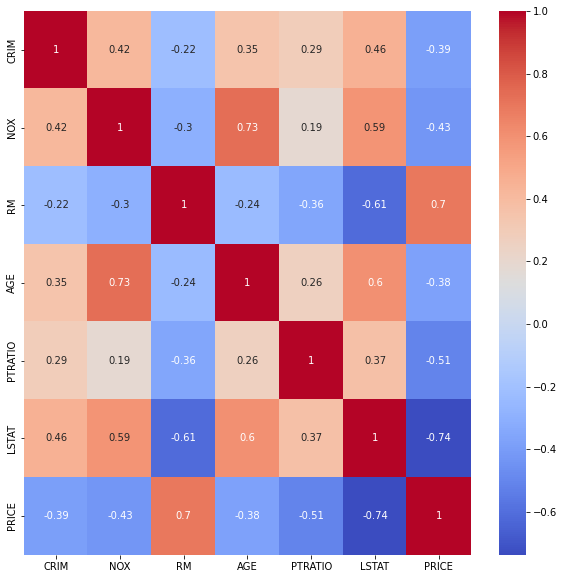

In [3]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot=True)

# Pick the 3 highest positives from heatmap

### 2. Select feature matrix (X) and target vector (y)

In [11]:
X = df[["LSTAT","PTRATIO","RM"]] 
y = df['PRICE']

### 3. Split your data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

### 4. Instantiate your model and fit it on the training set.

In [15]:
# Linear Regression
scaler = StandardScaler()
lin_reg = LinearRegression()

lin_reg_pip = make_pipeline(scaler, lin_reg)

lin_reg_pip.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [17]:
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### 5. Evaluate your model performance using R^2

In [18]:
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(train_r2)
print(test_r2)

-55.53371207850503
-76.23014185533192


### 6. Evaluate your model using mean absolute error (MAE)

In [19]:
train_MEA = mean_absolute_error(y_train, train_pred)
test_MAE = mean_absolute_error(y_test, test_pred)

print(train_MEA)
print(test_MAE)

65.69112102640378
68.52311455399537


### Evaluate your model using mean squared error (MSE)

In [20]:
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)

print(train_MSE)
print(test_MSE)

5013.507477451663
5408.206238144315


### 8. Evaluate your model performance using RMSE 

In [21]:
train_RSME = np.sqrt(train_MSE)
test_RSME = np.sqrt(test_MSE)

print(train_RSME)
print(test_RSME)

70.80612598816336
73.5405074645553
